<div style="border:solid green 2px; padding: 20px">
    
<b>Вадим, привет! Это Александр</b> Я рад тебя видеть на финальном спринте (Основной проект).

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если у тебя возникают вопросы — пиши об этом в слаке, не стесняйся. Так же, мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
    
---

# Мобильное приложение "Ненужные вещи" - Выделение групп пользователей на основе поведения

**Описание данных**

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет mobile_dataset.csv содержит колонки:

event.time — время совершения

event.name — название события

user.id — идентификатор пользователя

Датасет mobile_sources.csv содержит колонки:

userId — идентификатор пользователя

source — источник, с которого пользователь установил приложение


**Расшифровки событий:**

advert_open — открытие карточки объявления

photos_show — просмотр фотографий в объявлении

tips_show — пользователь увидел рекомендованные объявления

tips_click — пользователь кликнул по рекомендованному объявлению

contacts_show и show_contacts — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления

contacts_call — пользователь позвонил по номеру телефона на карточке объявления

map — пользователь открыл карту размещенных объявлений

search_1 — search_7 — разные события, связанные с поиском по сайту

favorites_add — добавление объявления в избранное

# Декомпозиция

###  Предобработка

1.1 Проверка на дубликаты

1.2 Приведение данных в порядок (настройка времени, приведение переменных к единому стилю, приведение типов данных)

1.3 Проверка на пропуски


### Исследовательский анализ данных - общее поведение пользователей

2.1 Изучение общей информации о данных

2.2 Изучение распределения признаков

2.3 Анализ числа событий и пользователей

2.4 Анализ воронки событий

2.5 Анализ влияния событий на совершение целевого события

### Сегментация пользователей на основе действий
3.1 Необходимо выделить группы пользователей

3.2 Определить, пользователи какой группы склонны часто возвращаться в мобильное приложение (retention rate)

3.3 Определить, пользователи какой группы часто делают целевое событие (конверсия в целевое действие)

### Проверка гипотез

4.1 Одни пользователи совершают действия tips_show и tips_click, другие — только tips_show.

Проверить гипотезу: конверсия в просмотры контактов различается у этих двух групп.

4.2 Проверить гипотезу: У разных групп пользователей примерно одинаковое время сессий в приложении

4.3 Конверсии в просмотры контактов среднеактивных и активных пользователей одинаковы

### Выводы

### Ссылка на дашборд

### Ссылка на презентацию

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__


Хорошей практикой является - наличие в проекте описания данных и цели работы, это позволит читателям быстро понять, о чём исследование.

Также желательно давать работе какое-то ёмкое наименование (заголовок), о чём она, если ты будешь составлять портфолио проектов, то будет важно показать с первых секунд, какая задача тут решалась.
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__


Твой проект тяжело читать, т.к. в нем нет заголовков/подзаголовков. Где начинается раздел, шаги и где они заканчиваются. Поправь, пожалуйста, оформление проекта

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__


Отличная практика - расписывать цель и основные этапы перед началом проекта

***Предобработка данных***

Подгрузим нужные библиотеки

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 7)})
import plotly.express as px
import math as mth
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from scipy import stats as st

In [ ]:
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

Посмотрим первичную информацию о mobile_sourсes

In [ ]:
mobile_sourсes.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [ ]:
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [ ]:
mobile_sourсes.tail()

,userId,source
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex
4292,d157bffc-264d-4464-8220-1cc0c42f43a9,google


Приведем названия столбцов в датасетах к стандартному виду

In [ ]:
mobile_sourсes.columns = ['user_id', 'source']
mobile_dataset.columns = ['event_time', 'event_name', 'user_id']

In [ ]:
mobile_dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

In [ ]:
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time']).dt.floor("S")
mobile_dataset.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


Проверим на наличие пропусков

In [ ]:
mobile_sourсes.isna().sum()

user_id    0
source     0
dtype: int64

In [ ]:
mobile_dataset.isna().sum()

event_time    0
event_name    0
user_id       0
dtype: int64

In [ ]:
mobile_dataset['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

Проверим на дубликаты

In [ ]:
mobile_sourсes.duplicated().sum()

0

In [ ]:
mobile_dataset.duplicated().sum()

1143

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

    
Проверка на дубликаты - основа предобработки данных

In [ ]:
mob_df = mobile_dataset.drop_duplicates()
mob_df

,event_time,event_name,user_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


Объединим два датасета в один

In [ ]:
df = mob_df.merge(mobile_sourсes, on='user_id', how='left')
df

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
...,...,...,...,...
73049,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
73050,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
73051,2019-11-03 23:56:57,search_1,20850c8f-4135-4059-b13b-198d3ac59902,google
73052,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google


In [ ]:
df['source'].value_counts()

yandex    33845
google    20158
other     19051
Name: source, dtype: int64

В данных всего 3 источника: Яндекс, Гугл и все остальные

In [ ]:
print('Количество уникальных пользователей:', df['user_id'].nunique())

Количество уникальных пользователей: 4293


In [ ]:
df['event_time'].describe()

count                   73054
unique                  71291
top       2019-10-22 13:00:04
freq                        4
first     2019-10-07 00:00:00
last      2019-11-03 23:58:12
Name: event_time, dtype: object

In [ ]:
print('Располагаем данными за:', df['event_time'].max() - df['event_time'].min())

Располагаем данными за: 27 days 23:58:12


У нас имеются данные с 07 октября по 03 ноября 2019 года, почти 28 дней

In [ ]:
df['event_name'].value_counts()

tips_show        39907
photos_show       9352
advert_open       6146
contacts_show     4297
map               3749
search_1          3488
favorites_add     1414
search_5          1049
tips_click         811
search_4           701
contacts_call      534
search_3           521
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

In [ ]:
df.loc[df['event_name']=='show_contacts', 'event_name'] = 'contacts_show'

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Действительно, данные события можно объединить
</div>

In [ ]:
df.duplicated().sum()

0

События contacts_show и show_contacts по техническому заданию - это одно и тоже событие, поэтому объединим их

In [ ]:
def rename(name):
    if 'search_' in name:
        return 'search'
    else:
        return name

In [ ]:
df['event_name']=df['event_name'].apply(rename)

In [ ]:
df['event_name'].value_counts()

tips_show        39907
photos_show       9352
search            6765
advert_open       6146
contacts_show     4376
map               3749
favorites_add     1414
tips_click         811
contacts_call      534
Name: event_name, dtype: int64

In [ ]:
df.duplicated().sum()

81

После объединения поисков снова появились дубликаты, можно их удалить, так как их очень мало в общей массе

In [ ]:
df = df.drop_duplicates()
df

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
...,...,...,...,...
73049,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
73050,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
73051,2019-11-03 23:56:57,search,20850c8f-4135-4059-b13b-198d3ac59902,google
73052,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['event_date'] = df['event_time'].astype('datetime64[D]')
df

,event_time,event_name,user_id,source,event_date
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
...,...,...,...,...,...
73049,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03
73050,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03
73051,2019-11-03 23:56:57,search,20850c8f-4135-4059-b13b-198d3ac59902,google,2019-11-03
73052,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72973 entries, 0 to 73053
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  72973 non-null  datetime64[ns]
 1   event_name  72973 non-null  object        
 2   user_id     72973 non-null  object        
 3   source      72973 non-null  object        
 4   event_date  72973 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.3+ MB


***Вывод:***

Проверили на корректность наименований, на типы данных, на дубликаты и пропуски - привели их в соответствие.

У нас имеются данные с 07 октября по 03 ноября 2019 года, почти 28 дней.

4293 уникальных пользователей.

События среди пользователей распределены равномерно по дням исследования.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

На этом этапе всё хорошо. Ты корректно выгрузила данные и посмотрела их содержимое. Выполнила первичную проверку на пропуски и дубликаты. Можно приступать к следующему шагу
</div>

***Предварительный анализ***


Количество событий, количество пользователей, среднее количество событий на пользователя

In [ ]:
users = len(df.groupby('user_id').agg({'user_id': 'nunique'}))
print('Количество пользователей:', users)

Количество пользователей: 4293


In [ ]:
events = len(df)
print('Количество событий:', events)

Количество событий: 72973


In [ ]:
event_per_user = events/users
print ('Cреднее количество событий на пользователя:', round(event_per_user,2))

Cреднее количество событий на пользователя: 17.0


In [ ]:
df['date'] = df['event_time'].dt.date

In [ ]:
print('Начало регистрации данных:',df['date'].min())

Начало регистрации данных: 2019-10-07


In [ ]:
print('Конец регистрации данных:',df['date'].max())

Конец регистрации данных: 2019-11-03


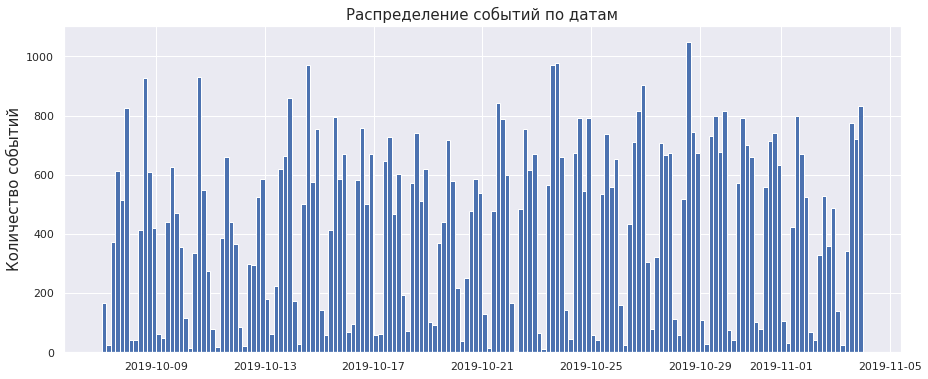

In [ ]:
df['event_time'].hist(bins=7*24, figsize=(15, 6))

plt.title('Распределение событий по датам', size='15')
plt.ylabel('Количество событий', size='15')
plt.xlabel(None);

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Все верно

In [ ]:
df = df.sort_values(by = ['user_id', 'event_time'])
df['ts_prev'] = df.groupby('user_id').event_time.shift(1)

df['sec_diff_gt900'] = ((df.event_time - df.ts_prev) / np.timedelta64(1, 's') > 900).astype('int')
df['session_for_user'] = df.groupby('user_id').sec_diff_gt900.cumsum()
df['num_sess_for_user'] = df['session_for_user']+1
df

,event_time,event_name,user_id,source,event_date,date,ts_prev,sec_diff_gt900,session_for_user,num_sess_for_user
792,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,2019-10-07,NaT,0,0,1
793,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,2019-10-07,2019-10-07 13:39:45,0,0,1
796,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,2019-10-07,2019-10-07 13:40:31,0,0,1
807,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,2019-10-07,2019-10-07 13:41:05,0,0,1
816,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,2019-10-07,2019-10-07 13:43:20,0,0,1
...,...,...,...,...,...,...,...,...,...,...
71463,2019-11-03 15:51:23,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,2019-11-03,2019-11-03 15:50:56,0,35,36
71468,2019-11-03 15:51:57,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,2019-11-03,2019-11-03 15:51:23,0,35,36
71556,2019-11-03 16:07:40,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,2019-11-03,2019-11-03 15:51:57,1,36,37
71560,2019-11-03 16:08:18,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,2019-11-03,2019-11-03 16:07:40,0,36,37


In [ ]:
df.drop({'ts_prev','sec_diff_gt900', 'session_for_user'},inplace = True, axis = 1) #удалим вспмогательные столбцы

In [ ]:
df.sample(10)

,event_time,event_name,user_id,source,event_date,date,num_sess_for_user
37160,2019-10-22 11:59:58,tips_show,6b5fca5f-92ef-43f6-a52a-9f73b5e53c8f,google,2019-10-22,2019-10-22,1
32854,2019-10-20 17:44:03,photos_show,9f95c9ee-750c-4dd5-8b2a-275105f9c9e7,other,2019-10-20,2019-10-20,13
7034,2019-10-10 00:48:55,tips_show,c82e1b55-3a66-4945-abf3-79de495bd57e,yandex,2019-10-10,2019-10-10,1
44465,2019-10-24 18:05:48,tips_show,f1568c90-ab2f-43d9-a029-6f0a2086c9ae,google,2019-10-24,2019-10-24,1
5473,2019-10-09 11:25:55,tips_show,164f8b3c-4ed2-4d61-a1db-6d6d1de677a9,other,2019-10-09,2019-10-09,1
67561,2019-11-01 18:23:18,tips_show,1574e291-0dee-4abb-8b72-79d1cafc358a,other,2019-11-01,2019-11-01,1
19904,2019-10-15 15:44:46,tips_show,dfd5756c-255d-46ec-a443-fbc4a9784d64,other,2019-10-15,2019-10-15,2
11827,2019-10-12 15:45:45,tips_show,95e6817d-7b08-4943-b363-133f86e1840e,other,2019-10-12,2019-10-12,1
18346,2019-10-14 22:28:49,photos_show,f8c6e74c-4161-4f6c-9468-7e55697dbd30,google,2019-10-14,2019-10-14,1
45878,2019-10-25 11:01:14,tips_show,ef91fbdf-f8fb-486e-8bd4-8985d8aab020,google,2019-10-25,2019-10-25,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72973 entries, 792 to 71561
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   event_time         72973 non-null  datetime64[ns]
 1   event_name         72973 non-null  object        
 2   user_id            72973 non-null  object        
 3   source             72973 non-null  object        
 4   event_date         72973 non-null  datetime64[ns]
 5   date               72973 non-null  object        
 6   num_sess_for_user  72973 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 4.5+ MB


In [ ]:
sessions = df.groupby('user_id').agg({'num_sess_for_user':'max', 'event_name':'count'}).reset_index()
sessions.columns = ['user_id', 'number_of_sessions','number_of_events']
sessions['events_per_session'] = round(sessions['number_of_events']/sessions['number_of_sessions'],2)
sessions['sessions_per_day'] = round(sessions['number_of_sessions']/28,2)
sessions['sessions_per_week'] = round(sessions['number_of_sessions']/4,2)
sessions.sample(10)

,user_id,number_of_sessions,number_of_events,events_per_session,sessions_per_day,sessions_per_week
861,321298ad-7c8c-438f-b170-32c777d39c65,2,4,2.00,0.07,0.50
2645,9db002f7-41e7-4eaf-892c-3249834c0d73,6,6,1.00,0.21,1.50
2959,b088c790-c70b-473c-a774-7f440365aa82,1,2,2.00,0.04,0.25
2671,9f3f3ae3-8397-4ca0-b1f9-a280b298dbac,1,13,13.00,0.04,0.25
3474,cf753c69-59cd-4648-b540-309f02a0b5a6,6,61,10.17,0.21,1.50
1818,6d5f7d73-51f0-42d6-bd4d-6d205342e5f3,3,4,1.33,0.11,0.75
51,03739d15-7212-415c-9c88-4dfc24b8d3b5,2,10,5.00,0.07,0.50
386,146c6d31-d314-4704-acac-b06c82dd13cd,2,9,4.50,0.07,0.50
1197,462e16f2-10fa-49d1-8bc5-ebebc2710b80,1,9,9.00,0.04,0.25
298,10b07842-8dd0-4a5b-8c70-4edbf4d3116a,1,4,4.00,0.04,0.25


In [ ]:
sessions.describe()

,number_of_sessions,number_of_events,events_per_session,sessions_per_day,sessions_per_week
count,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000
mean,2.687398,16.998137,7.543392,0.097864,0.671850
std,4.173946,28.587157,7.703807,0.148206,1.043487
min,1.000000,1.000000,1.000000,0.040000,0.250000
25%,1.000000,5.000000,3.000000,0.040000,0.250000
50%,2.000000,9.000000,5.000000,0.070000,0.500000
75%,3.000000,17.000000,9.000000,0.110000,0.750000
max,116.000000,470.000000,103.000000,4.140000,29.000000


Устранение выбросов

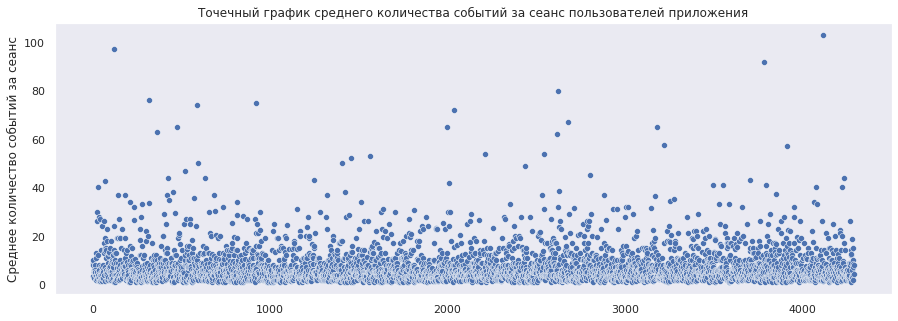

In [ ]:
x_values = pd.Series(range(0,sessions['user_id'].count()))
plt.figure(figsize=(15, 5))
sns.scatterplot(x=x_values, y="events_per_session", data=sessions)
plt.grid()
plt.title('Точечный график среднего количества событий за сеанс пользователей приложения')
plt.ylabel('Среднее количество событий за сеанс');

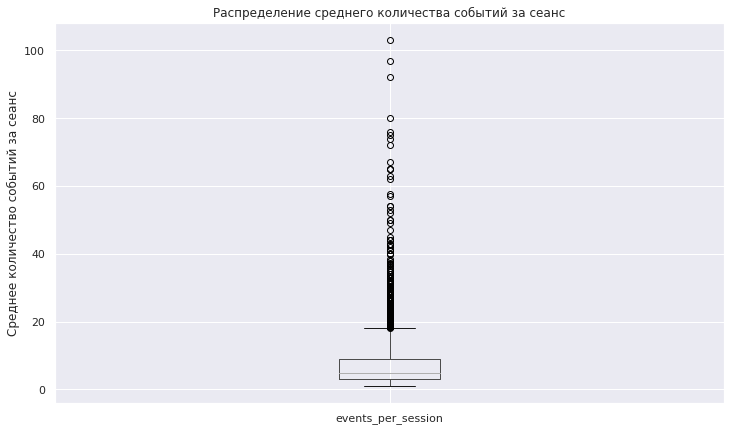

In [ ]:
sessions.boxplot(column='events_per_session', figsize=(12, 7))

plt.title('Распределение среднего количества событий за сеанс')
plt.ylabel('Среднее количество событий за сеанс')

plt.show()

In [ ]:
for q in range(90, 100, 1):
    print(f"{q / 100} квантиль = {sessions['events_per_session'].quantile(q=(q / 100))}")

0.9 квантиль = 15.0
0.91 квантиль = 16.0
0.92 квантиль = 17.0
0.93 квантиль = 18.0
0.94 квантиль = 19.0
0.95 квантиль = 21.0
0.96 квантиль = 23.0
0.97 квантиль = 26.0
0.98 квантиль = 30.0
0.99 квантиль = 37.0


Судя по квантилям, если мы уберем пользователей, которые в среднем за исследуемый период совершали больше 37-ми событий за сеанс, то потеряем примерно один процент исследуемых пользователей. Можно убрать

In [ ]:
sessions = sessions.query('events_per_session < 37')

In [ ]:
for q in range(90, 100, 1):
    print(f"{q / 100} квантиль = {sessions['number_of_sessions'].quantile(q=(q / 100))}")

0.9 квантиль = 5.0
0.91 квантиль = 5.0
0.92 квантиль = 6.0
0.93 квантиль = 6.0
0.94 квантиль = 7.0
0.95 квантиль = 8.0
0.96 квантиль = 9.0
0.97 квантиль = 10.0
0.98 квантиль = 13.0
0.99 квантиль = 19.0


Вывод:

Убрали пользователей, которые совершили больше сорока сеансов. Устранив выбросы мы сможем продуктивнее сегментировать пользователей

Выделение сегментов пользователей по среднему количеству событий за сеанс

In [ ]:
sessions.describe()

,number_of_sessions,number_of_events,events_per_session,sessions_per_day,sessions_per_week
count,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000
mean,2.703346,16.409991,7.022349,0.098414,0.675836
std,4.194413,27.784068,5.743949,0.148940,1.048603
min,1.000000,1.000000,1.000000,0.040000,0.250000
25%,1.000000,5.000000,3.000000,0.040000,0.250000
50%,2.000000,9.000000,5.000000,0.070000,0.500000
75%,3.000000,17.000000,9.000000,0.110000,0.750000
max,116.000000,470.000000,36.500000,4.140000,29.000000


Удалим показатели, на которые мы не будем опираться

In [ ]:
sessions.drop({'number_of_events', 'sessions_per_day', 'sessions_per_week'},inplace = True, axis = 1)

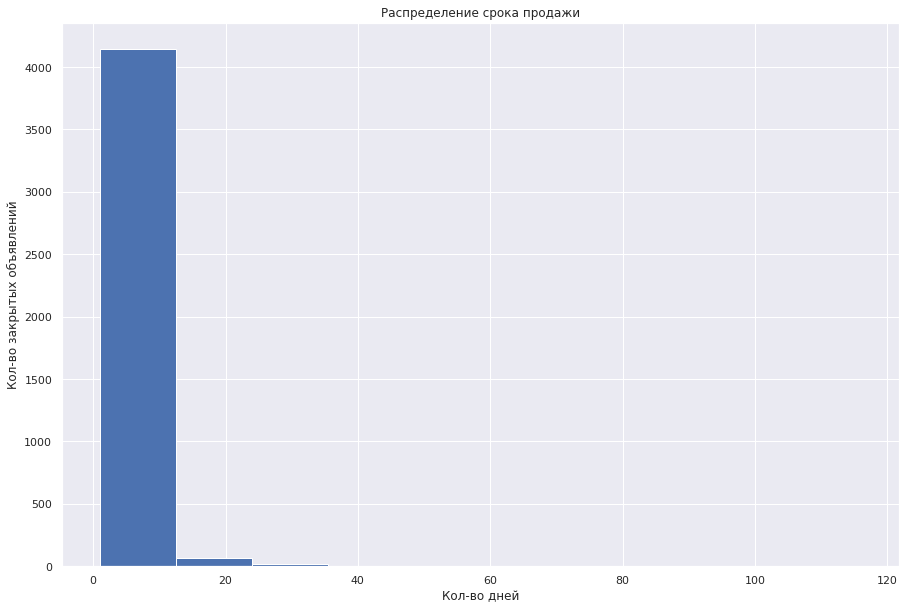

In [ ]:
sessions.hist(column='number_of_sessions', figsize=(15, 10), bins=10)

plt.title('Распределение срока продажи')
plt.xlabel('Кол-во дней')
plt.ylabel('Кол-во закрытых объявлений')

plt.show()

Выделим 4 сегмента пользователей:
- Новички
- Малоактивные
- Среднеактивные
- Активные

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__
    
В реальной практике тебе придется обосновать почему именно такое разделение. Чем полезно будет исследовать такие группы пользователей для заказчика? Было бы неплохо развернуто расписать свою идею) Предположить какие результаты получишь и сравнивать ожидание\реальность

</div>

<div>
    <span style="color:blue">

__Комментарий от студента №1__

Изменения №1 (Сегментация)
</div>

Я выбрал разделение на активность пользователей, так как считаю данную метрику самой оптимальной относительно приложения.\

Нам необходимо знать нашу целевую аудиторию, а так же знать, на каких этапах и в каком виде активна новая аудитория, какой отток клиентов каждого сегмента и насколько по времени задерживается пользователь каждой группы в нашем приложении. Если мы будем знать, как ведут себя 4 группы пользователей, то нам будет проще прогнозировать дальнейшие наши действия , что бы оказывать полезное влияние на все сегменты точечно

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Очень хорошо, что обосновал свой выбор сегментации
</div>

Новички приложения

In [ ]:
new_users = sessions.query('number_of_sessions == 1').reset_index()
print ('Количество пользователей в сегменте новичков:', len(new_users))
new_users.head(10)

Количество пользователей в сегменте новичков: 2036


,index,user_id,number_of_sessions,events_per_session
0,2,00463033-5717-4bf1-91b4-09183923b9df,1,10.0
1,6,005fbea5-2678-406f-88a6-fbe9787e2268,1,5.0
2,7,00653802-5ff1-4071-bc17-347fc4cef569,1,5.0
3,8,006a32d4-ee10-40dc-b237-11e0fde81cbc,1,6.0
4,9,006f6ced-225b-4f9c-9f17-23404bc6835f,1,5.0
5,11,007d031d-5018-4e02-b7ee-72a30609173f,1,8.0
6,12,009c0f37-8556-4c72-a007-100e28a37373,1,8.0
7,14,00aa4003-366b-4788-ad1f-506f2b51b8cb,1,6.0
8,15,00af35c4-2045-4960-96b8-7fd5f1978a88,1,5.0
9,17,00ba2474-01c3-481a-8cf2-6d4636a8a1ca,1,13.0


In [ ]:
sessions = sessions.query('number_of_sessions > 1')

Сегмент малоактивных пользователей

In [ ]:
sessions.describe()

,number_of_sessions,events_per_session
count,2208.000000,2208.000000
mean,4.274004,5.693773
std,5.355222,5.005517
min,2.000000,1.000000
25%,2.000000,2.500000
50%,3.000000,4.000000
75%,4.000000,7.000000
max,116.000000,36.500000


Теперь выделим сегмент малоактивных пользователей - в среднем до четырех событий за сеанс

In [ ]:
inactive_users = sessions.query('events_per_session <= 4')
print ('Количество малоактивных пользователей:', len(inactive_users))
inactive_users.head(10)

Количество малоактивных пользователей: 1155


,user_id,number_of_sessions,events_per_session
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,9,3.56
4,00551e79-152e-4441-9cf7-565d7eb04090,3,2.67
16,00b59e77-3dc8-4193-a217-c50b9fe849bf,2,3.50
22,013bbb57-ca6f-4af3-b586-4a046d3d3dee,6,2.50
26,0164902d-7393-47e1-9d5b-0ec4c0171cdc,3,2.33
34,01d283e1-cb1c-407a-a4e0-9f72f3deecca,5,1.20
39,0216e1bd-0984-4ba4-a2b2-c186bf56b6f9,2,1.50
40,0236feca-f39b-45c1-9de5-b5ee51e0aa9b,2,4.00
41,024828cf-c873-43e6-8c7e-96aeb348699e,5,2.00
42,02945421-8f8c-4823-8e8b-3e9aca9eee59,3,3.67


In [ ]:
sessions = sessions.query('events_per_session > 4')

Сегмент среднеактивных пользователей

In [ ]:
sessions.describe()

,number_of_sessions,events_per_session
count,1053.000000,1053.000000
mean,4.460589,9.094549
std,5.557307,5.447626
min,2.000000,4.100000
25%,2.000000,5.500000
50%,3.000000,7.330000
75%,4.000000,10.580000
max,79.000000,36.500000


Среднеактивными пользователями примем тех, кто в среднем совершает до десяти событий за сеанс (75-ый квантиль)

In [ ]:
medium_active_users = sessions.query('events_per_session <= 10')
print ('Количество среднеактивных пользователей:', len(medium_active_users))
medium_active_users.head(10)

Количество среднеактивных пользователей: 760


,user_id,number_of_sessions,events_per_session
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,8.75
1,00157779-810c-4498-9e05-a1e9e3cedf93,9,7.89
5,00554293-7e00-4122-b898-4e892c4a7c53,2,5.50
10,00753c79-ea81-4456-acd0-a47a23ca2fb9,4,4.25
13,00a93a72-3bbc-4ee7-8a81-7134f45ae009,3,5.00
33,01b80a0a-f51b-4061-a485-8ceeb626a3f9,3,5.00
36,02012123-f8ee-40f4-8ccd-c5859f3fbc41,4,5.75
44,02c90994-8de8-49e8-a384-415fb1602ac5,8,5.00
45,02d68ba9-300f-44cd-aefb-b9905cc550a0,2,7.50
51,03739d15-7212-415c-9c88-4dfc24b8d3b5,2,5.00


Сегмент активных пользователей

Активными пользователями будем считать тех, кто совершает в среднем более десяти событий за сеанс

In [ ]:
active_users = sessions.query('events_per_session > 10')
print ('Количество активных пользователей:', len(active_users))
active_users.head(10)

Количество активных пользователей: 293


,user_id,number_of_sessions,events_per_session
67,04adf25e-cb60-4cbd-bedc-ddc1057cde06,8,13.75
76,04fb9b01-30bb-49f4-bbaa-e095c0bbff18,3,11.00
77,050311ed-1ddd-48d8-8195-ae327f905427,2,14.00
84,056dec65-545a-4123-b95d-3ca96ed31133,3,11.67
91,05b35678-bbc6-47f0-b552-ab639249a0d4,6,13.17
121,076f2de3-268b-4cf1-ade7-73d09752e3b3,3,14.33
151,08b25050-2a3d-48af-bb45-ac437ec7ed3d,2,19.00
162,094abcd3-4022-4e55-94f9-e416a4416752,2,23.00
181,0a59892f-3578-484b-af84-eb3b2298fb8c,6,10.83
189,0b090b44-12c0-4292-8f4b-bee2424512b6,3,13.00


Вывод:

Сегментировали пользователей по среднему количеству событий за сессию на четыре группы:

Пользователи-новички. Один сеанс в приложении. Самое большое число пользователей. Всего: 2034 (почти 50% пользователей).

Малоактивные пользователи. В среднем совершают до четырех событий за сеанс. Всего: 1138.

Среднеактивные пользователи. В среднем совершают от четырех до десяти событий за сеанс. По сути целевая аудитория. Всего: 768

Активные пользователи. Больше десяти действий за сеанс. Активно пользуются приложением. Всего: 301.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Корректная реализация, молодец)

***Исследовательский анализ***

Рассчитаем метрики внутри выделенных сегментов

Retantion Rate «коэффициент удержания»

Сформируем когорты по данным за неделю:

In [ ]:
first_activity_date = df.groupby(['user_id'])['event_time'].min()
first_activity_date.name = 'first_activity_date'
df = df.merge(first_activity_date, on='user_id', how='inner')
df.head()

,event_time,event_name,user_id,source,event_date,date,num_sess_for_user,first_activity_date
0,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,2019-10-07,1,2019-10-07 13:39:45
1,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,2019-10-07,1,2019-10-07 13:39:45
2,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,2019-10-07,1,2019-10-07 13:39:45
3,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,2019-10-07,1,2019-10-07 13:39:45
4,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,2019-10-07,1,2019-10-07 13:39:45


In [ ]:
df['activity_week'] = df['event_time'].astype('datetime64[W]')
df['first_activity_week'] = df['first_activity_date'].astype('datetime64[W]')
df.head()

,event_time,event_name,user_id,source,event_date,date,num_sess_for_user,first_activity_date,activity_week,first_activity_week
0,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,2019-10-07,1,2019-10-07 13:39:45,2019-10-03,2019-10-03
1,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,2019-10-07,1,2019-10-07 13:39:45,2019-10-03,2019-10-03
2,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,2019-10-07,1,2019-10-07 13:39:45,2019-10-03,2019-10-03
3,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,2019-10-07,1,2019-10-07 13:39:45,2019-10-03,2019-10-03
4,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,2019-10-07,1,2019-10-07 13:39:45,2019-10-03,2019-10-03


Рассчитаем lifetime каждого пользователя в рамках когорты.

In [ ]:
df['cohort_lifetime'] = df['activity_week'] - df['first_activity_week']
df['cohort_lifetime'] = df['cohort_lifetime'] / np.timedelta64(1,'W')
df['cohort_lifetime'] = df['cohort_lifetime'].astype('int')

Дальше будем рассмотривать Retantion Rate внутри каждого сегмента по отдельности

Новички приложения

Retantion Rate - коэфициент удержания, который показывает сколько пользователей из когорты относительно их изначального числа вернулись в приложение еще раз. Но про пользователей-новичков мы знаем, что они совершили только один сеанс и больше в приложении не возвращались, так что рассчитывать эту метрику для данного сегмента нецелесообразно

Малоактивные пользователи

In [ ]:
inactive_users_1 = df.merge(inactive_users, on='user_id', how='inner')

In [ ]:
inactive_users_1.sample(5)

,event_time,event_name,user_id,source,event_date,date,num_sess_for_user,first_activity_date,activity_week,first_activity_week,cohort_lifetime,number_of_sessions,events_per_session
1586,2019-10-11 11:43:01,contacts_show,21230dd9-2f7f-4b77-a436-43d4d10388e0,yandex,2019-10-11,2019-10-11,8,2019-10-10 13:09:40,2019-10-10,2019-10-10,0,116,3.43
8659,2019-10-25 14:50:50,favorites_add,b7e6a860-5ec7-4ba8-9a92-95b8246ff015,yandex,2019-10-25,2019-10-25,1,2019-10-25 14:50:50,2019-10-24,2019-10-24,0,4,2.75
4848,2019-10-21 15:04:49,contacts_call,680a667f-8cee-4b1d-9272-aa01d633dca9,other,2019-10-21,2019-10-21,2,2019-10-21 14:19:52,2019-10-17,2019-10-17,0,4,2.25
572,2019-10-18 19:34:36,photos_show,0c01df72-689e-4a2c-bb76-518a8d1d22b1,google,2019-10-18,2019-10-18,9,2019-10-12 14:13:37,2019-10-17,2019-10-10,1,23,2.30
7757,2019-10-26 14:48:28,photos_show,a171a5e2-0d57-40df-8903-06dd17e177cf,google,2019-10-26,2019-10-26,3,2019-10-11 13:37:31,2019-10-24,2019-10-10,2,5,2.80


Посчитаем для каждой когорты количество активных пользователей на определённую «неделю жизни»

In [ ]:
inactive_users_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12246 entries, 0 to 12245
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   event_time           12246 non-null  datetime64[ns]
 1   event_name           12246 non-null  object        
 2   user_id              12246 non-null  object        
 3   source               12246 non-null  object        
 4   event_date           12246 non-null  datetime64[ns]
 5   date                 12246 non-null  object        
 6   num_sess_for_user    12246 non-null  int64         
 7   first_activity_date  12246 non-null  datetime64[ns]
 8   activity_week        12246 non-null  datetime64[ns]
 9   first_activity_week  12246 non-null  datetime64[ns]
 10  cohort_lifetime      12246 non-null  int64         
 11  number_of_sessions   12246 non-null  int64         
 12  events_per_session   12246 non-null  float64       
dtypes: datetime64[ns](5), float64(1

In [ ]:
cohorts = inactive_users_1.groupby(['first_activity_week','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()
cohorts

,first_activity_week,cohort_lifetime,user_id
0,2019-10-03,0,159
1,2019-10-03,1,78
2,2019-10-03,2,49
3,2019-10-03,3,30
4,2019-10-03,4,19
5,2019-10-10,0,325
6,2019-10-10,1,140
7,2019-10-10,2,97
8,2019-10-10,3,45
9,2019-10-17,0,331


In [ ]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week','user_id']]
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})
initial_users_count

,first_activity_week,cohort_users
0,2019-10-03,159
5,2019-10-10,325
9,2019-10-17,331
12,2019-10-24,243
14,2019-10-31,97


Наконец-то можем посчитать Retention Rate:

In [ ]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_week')
cohorts['retention'] = round(cohorts['user_id']/cohorts['cohort_users'], 2)
cohorts

,first_activity_week,cohort_lifetime,user_id,cohort_users,retention
0,2019-10-03,0,159,159,1.00
1,2019-10-03,1,78,159,0.49
2,2019-10-03,2,49,159,0.31
3,2019-10-03,3,30,159,0.19
4,2019-10-03,4,19,159,0.12
5,2019-10-10,0,325,325,1.00
6,2019-10-10,1,140,325,0.43
7,2019-10-10,2,97,325,0.30
8,2019-10-10,3,45,325,0.14
9,2019-10-17,0,331,331,1.00


Построим тепловую карту

In [ ]:
retention_pivot = cohorts.pivot_table(index='first_activity_week',columns='cohort_lifetime',values='retention',aggfunc='sum')

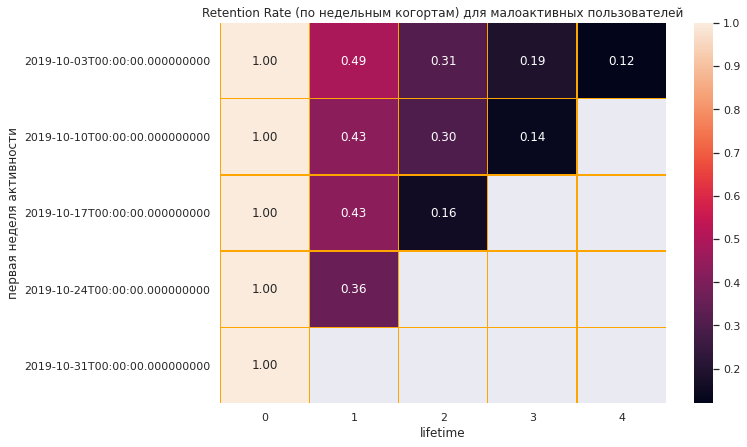

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 7))
plt.title('Retention Rate (по недельным когортам) для малоактивных пользователей')
sns.heatmap(retention_pivot, annot=True, fmt='.2f', linewidths=0.2, linecolor='orange')
plt.gca().set(xlabel='lifetime', ylabel='первая неделя активности')
plt.show()

Вывод:
Коэффциент удержания за исследуемый период с 49-ти % упал до 12-ти. Для первой и второй когорты неплохие показатели на втором лайфтайме. Больше гордиться нечем.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Отлично! Retention rate рассчитан верно и тепловая карта оформлена корректно
</div>

Среднеактивные пользователи

In [ ]:
medium_active_users_1 = df.merge(medium_active_users, on='user_id', how='inner')

In [ ]:
cohorts = medium_active_users_1.groupby(['first_activity_week','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()
cohorts

,first_activity_week,cohort_lifetime,user_id
0,2019-10-03,0,107
1,2019-10-03,1,51
2,2019-10-03,2,32
3,2019-10-03,3,22
4,2019-10-03,4,18
5,2019-10-10,0,220
6,2019-10-10,1,88
7,2019-10-10,2,58
8,2019-10-10,3,26
9,2019-10-17,0,203


In [ ]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week','user_id']]
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})
initial_users_count

,first_activity_week,cohort_users
0,2019-10-03,107
5,2019-10-10,220
9,2019-10-17,203
12,2019-10-24,174
14,2019-10-31,56


In [ ]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_week')
cohorts['retention'] = round(cohorts['user_id']/cohorts['cohort_users'], 2)
cohorts

,first_activity_week,cohort_lifetime,user_id,cohort_users,retention
0,2019-10-03,0,107,107,1.00
1,2019-10-03,1,51,107,0.48
2,2019-10-03,2,32,107,0.30
3,2019-10-03,3,22,107,0.21
4,2019-10-03,4,18,107,0.17
5,2019-10-10,0,220,220,1.00
6,2019-10-10,1,88,220,0.40
7,2019-10-10,2,58,220,0.26
8,2019-10-10,3,26,220,0.12
9,2019-10-17,0,203,203,1.00


In [ ]:
retention_pivot = cohorts.pivot_table(index='first_activity_week', columns='cohort_lifetime', values='retention', aggfunc='sum')

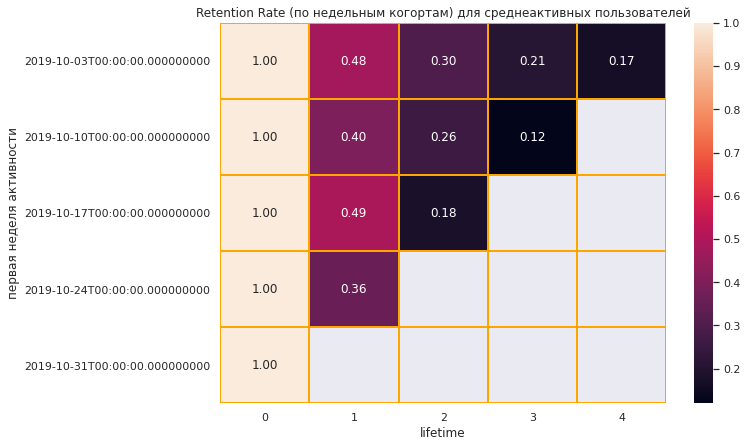

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 7))
plt.title('Retention Rate (по недельным когортам) для среднеактивных пользователей')
sns.heatmap(retention_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='orange')
plt.gca().set(xlabel='lifetime', ylabel='первая неделя активности')
plt.show()

Вывод:
В третей когорте начальные коэффициент чуть-чуть выше, чем в первой. Опять неплохие показатели для первой и второй когорты на втором лайфтайме.

Активные пользователи

In [ ]:
active_users_1 = df.merge(active_users, on='user_id', how='inner')

In [ ]:
cohorts = active_users_1.groupby(['first_activity_week','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()
cohorts

,first_activity_week,cohort_lifetime,user_id
0,2019-10-03,0,45
1,2019-10-03,1,18
2,2019-10-03,2,11
3,2019-10-03,3,8
4,2019-10-03,4,1
5,2019-10-10,0,87
6,2019-10-10,1,32
7,2019-10-10,2,18
8,2019-10-10,3,8
9,2019-10-17,0,68


In [ ]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week','user_id']]
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})
initial_users_count

,first_activity_week,cohort_users
0,2019-10-03,45
5,2019-10-10,87
9,2019-10-17,68
12,2019-10-24,72
14,2019-10-31,21


In [ ]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_week')
cohorts['retention'] = round(cohorts['user_id']/cohorts['cohort_users'], 2)
cohorts

,first_activity_week,cohort_lifetime,user_id,cohort_users,retention
0,2019-10-03,0,45,45,1.00
1,2019-10-03,1,18,45,0.40
2,2019-10-03,2,11,45,0.24
3,2019-10-03,3,8,45,0.18
4,2019-10-03,4,1,45,0.02
5,2019-10-10,0,87,87,1.00
6,2019-10-10,1,32,87,0.37
7,2019-10-10,2,18,87,0.21
8,2019-10-10,3,8,87,0.09
9,2019-10-17,0,68,68,1.00


In [ ]:
retention_pivot = cohorts.pivot_table(index='first_activity_week', columns='cohort_lifetime', values='retention', aggfunc='sum')

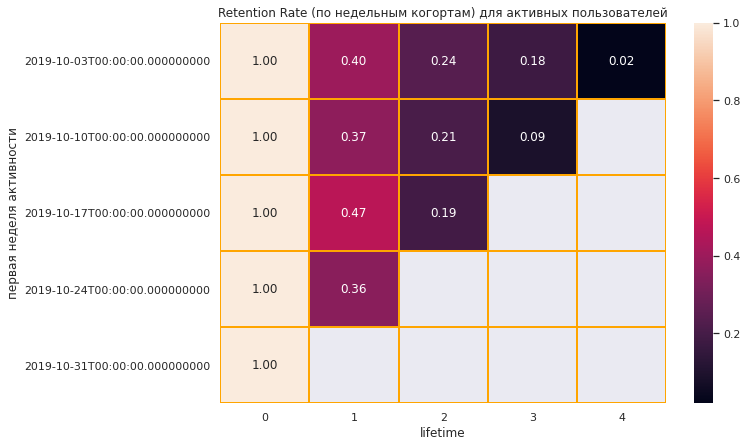

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 7))
plt.title('Retention Rate (по недельным когортам) для активных пользователей')
sns.heatmap(retention_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='orange')
plt.gca().set(xlabel='lifetime', ylabel='первая неделя активности')
plt.show()

Вывод:
Начальный коэфициент в третьей когорте выше, чем в первой. С каждым лайфтаймом коэфциент все ниже и для первой когорты снизился до 2%.

Общий вывод о Retention Rate:
Малоактивные и среднеактивные пользователи более-менее регулярно пользуются приложением. Активные пользователи очень непостоянны. Во всех сегментах с каждой новой когортой поведение покупателей меняется.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Да, результаты получились интересными
</div>

Время проведенное в приложении

Заведем столбец active_session, где будет отображаться длительность сеанса

In [ ]:
time = df[{'user_id','num_sess_for_user','event_time'}]
time.head()

,num_sess_for_user,event_time,user_id
0,1,2019-10-07 13:39:45,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
1,1,2019-10-07 13:40:31,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
2,1,2019-10-07 13:41:05,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
3,1,2019-10-07 13:43:20,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
4,1,2019-10-07 13:45:30,0001b1d5-b74a-4cbf-aeb0-7df5947bf349


In [ ]:
time['pre_action_time'] = time.groupby(['user_id','num_sess_for_user'])['event_time'].shift(1)
time['time_of_event'] = time['event_time'] - time['pre_action_time']
time.head()

,num_sess_for_user,event_time,user_id,pre_action_time,time_of_event
0,1,2019-10-07 13:39:45,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,NaT,NaT
1,1,2019-10-07 13:40:31,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,0 days 00:00:46
2,1,2019-10-07 13:41:05,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:40:31,0 days 00:00:34
3,1,2019-10-07 13:43:20,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:41:05,0 days 00:02:15
4,1,2019-10-07 13:45:30,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:43:20,0 days 00:02:10


Заведем таблицу с данными о длительности сеанса

In [ ]:
sess_time = time.groupby(['user_id','num_sess_for_user'])['event_time'].max() - time.groupby(['user_id','num_sess_for_user'])['event_time'].min()
sess_time = pd.DataFrame(sess_time).reset_index()
sess_time = sess_time.rename(columns={'event_time':'active_session'})
sess_time

,user_id,num_sess_for_user,active_session
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:09:56
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,0 days 00:08:27
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,0 days 00:15:00
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,0 days 00:12:38
4,00157779-810c-4498-9e05-a1e9e3cedf93,1,0 days 00:25:21
...,...,...,...
11532,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,33,0 days 00:00:00
11533,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,34,0 days 00:04:57
11534,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,35,0 days 00:15:49
11535,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,36,0 days 00:15:56


In [ ]:
sess_time['active_session'].describe()

count                        11537
mean     0 days 00:09:26.451417179
std      0 days 00:14:11.184423881
min                0 days 00:00:00
25%                0 days 00:00:05
50%                0 days 00:04:19
75%                0 days 00:13:03
max                0 days 03:53:39
Name: active_session, dtype: object

Среднее значение длительности сессии среди всех пользователей составляет 9 минуту 26 секунды, медианное - 4 минуты 19 секунд.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Здесь еще бы посмотреть что за события были в нулевой сессии. Возможно пользователь просто открыл приложение, появилась рекомендация `tips_show` и на этом его активность закончилась, тогда это не программный сбой.
</div>

Общее время для всех пользователей в приложении за используемый период:

In [ ]:
all_time = sess_time.groupby('user_id')['active_session'].sum()
all_time = pd.DataFrame(all_time).reset_index()
all_time = all_time.rename(columns={'active_session':'all_sess_time'})
all_time

,user_id,all_sess_time
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0 days 00:46:01
1,00157779-810c-4498-9e05-a1e9e3cedf93,0 days 02:07:52
2,00463033-5717-4bf1-91b4-09183923b9df,0 days 00:24:42
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,0 days 00:48:04
4,00551e79-152e-4441-9cf7-565d7eb04090,0 days 00:09:19
...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,0 days 00:49:25
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,0 days 00:00:53
4290,ffcf50d9-293c-4254-8243-4890b030b238,0 days 00:01:20
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,0 days 00:38:54


In [ ]:
all_time['all_sess_time'].describe()

count                         4293
mean     0 days 00:25:22.280456557
std      0 days 00:47:16.290927616
min                0 days 00:00:00
25%                0 days 00:05:32
50%                0 days 00:12:58
75%                0 days 00:27:28
max                0 days 18:08:56
Name: all_sess_time, dtype: object

Среднее значение общего времени в приложении всех пользователей составляет 25 минуту 22 секунды, медианное - 12 минуты 57 секунд.

Посмотрим на среднюю продолжительность сессий внутри каждого сегмента

Новички приложения

In [ ]:
new_users_2 = sess_time.merge(new_users, on='user_id', how='inner')

In [ ]:
new_users_2['active_session'].describe()

count                         2036
mean     0 days 00:12:43.979862475
std      0 days 00:12:21.013679234
min                0 days 00:00:00
25%         0 days 00:04:29.500000
50%                0 days 00:09:09
75%         0 days 00:17:30.250000
max                0 days 02:04:10
Name: active_session, dtype: object

Вывод:

Новички приложения совершают всего одну сессию и средняя её продолжительность составляет 12 минут 43 секунды

Малоактивные пользователи

In [ ]:
inactive_users_2 = sess_time.merge(inactive_users, on='user_id', how='inner')
inactive_users_2.head()

,user_id,num_sess_for_user,active_session,number_of_sessions,events_per_session
0,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,1,0 days 00:03:35,9,3.56
1,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2,0 days 00:01:24,9,3.56
2,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,3,0 days 00:07:38,9,3.56
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,4,0 days 00:05:37,9,3.56
4,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,5,0 days 00:10:00,9,3.56


На сеансах с продолжительностью 0 совершилось только одно действие.

Средняя продолжительность сеансов пользователей:

In [ ]:
inactive_users_2['active_session'].describe()

count                         4740
mean     0 days 00:03:47.949156118
std      0 days 00:06:30.448559209
min                0 days 00:00:00
25%                0 days 00:00:00
50%                0 days 00:00:41
75%                0 days 00:04:57
max                0 days 01:04:01
Name: active_session, dtype: object

Общая продолжительность проведенного времени в приложении отдельно по пользователям

In [ ]:
inactive_users_2 = all_time.merge(inactive_users, on='user_id', how='inner')

In [ ]:
inactive_users_2['all_sess_time'].describe()

count                         1155
mean     0 days 00:15:35.479653679
std      0 days 00:29:44.144162799
min                0 days 00:00:00
25%                0 days 00:03:20
50%                0 days 00:08:46
75%         0 days 00:17:53.500000
max                0 days 10:56:43
Name: all_sess_time, dtype: object

Вывод:

Средняя продолжительность сеанса малоактивного пользователя составляет 3 минуты 46 секунд. Среднее от общего времени пользователей, проведенного в приложении, составляет 15 минут 21 секунду.

Среднеактивные пользователи

In [ ]:
medium_active_users_2 = sess_time.merge(medium_active_users, on='user_id', how='inner')
medium_active_users_2.head()

,user_id,num_sess_for_user,active_session,number_of_sessions,events_per_session
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:09:56,4,8.75
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,0 days 00:08:27,4,8.75
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,0 days 00:15:00,4,8.75
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,0 days 00:12:38,4,8.75
4,00157779-810c-4498-9e05-a1e9e3cedf93,1,0 days 00:25:21,9,7.89


Средняя продолжительность сеансов пользователей:

In [ ]:
medium_active_users_2['active_session'].describe()

count                         3505
mean     0 days 00:10:16.087874465
std      0 days 00:12:45.429167329
min                0 days 00:00:00
25%                0 days 00:00:42
50%                0 days 00:05:53
75%                0 days 00:14:59
max                0 days 02:34:57
Name: active_session, dtype: object

Общая продолжительность проведенного времени в приложении отдельно по пользователям:

In [ ]:
medium_active_users_2 = all_time.merge(medium_active_users, on='user_id', how='inner')
medium_active_users_2['all_sess_time'].describe()

count                          760
mean        0 days 00:47:21.300000
std      0 days 01:07:48.098859601
min                0 days 00:02:49
25%         0 days 00:17:54.750000
50%         0 days 00:29:22.500000
75%         0 days 00:51:38.500000
max                0 days 18:08:56
Name: all_sess_time, dtype: object

Вывод:

Средняя продолжительность сеанса среднеактивного пользователя составляет 10 минут и 8 секунд. Среднее от общего времени пользователей, проведенного в приложении, составляет практически 47 минут.

Активные пользователи

Средняя продолжительность сеансов пользователей:

In [ ]:
active_users_2 = sess_time.merge(active_users, on='user_id', how='inner')
active_users_2['active_session'].describe()

count                         1192
mean     0 days 00:21:11.041946308
std      0 days 00:23:22.068244344
min                0 days 00:00:00
25%         0 days 00:03:58.750000
50%         0 days 00:14:40.500000
75%         0 days 00:30:27.500000
max                0 days 03:12:23
Name: active_session, dtype: object

Общая продолжительность проведенного времени в приложении отдельно по пользователям:

In [ ]:
active_users_2 = all_time.merge(active_users, on='user_id', how='inner')
active_users_2['all_sess_time'].describe()

count                          293
mean     0 days 01:26:10.928327645
std      0 days 01:31:15.700388520
min                0 days 00:11:28
25%                0 days 00:38:02
50%                0 days 01:00:18
75%                0 days 01:36:22
max                0 days 13:47:41
Name: all_sess_time, dtype: object

Вывод:


Средняя продолжительность сеанса активного пользователя составляет 20 минут и 38 секунд. Среднее от общего времени пользователей, проведенного в приложении, составляет практически 1 час 25 минут.

Общий вывод о времени проведенном в приложении:

Очевидно, что в выделенных нами сегментах показатели времени в приложении будут выше у активных пользователя, а у малоактивных - наоборот.

Новички приложения. Среднее время сеанса - 1 минута 44 секунды. Достаточно, чтобы изучить пару объявлений.
Малоактивные пользователи. Средняя продолжительность сеанса - 3 минуты 46 секунд. Среднее от общего времени - 15 минут 21 секунда. Пользователи, которые ищут определенное и точечно.

Среденеактивные пользователи. Средняя продолжительность сеанса - 10 минут и 8 секунд. Среднее от общего времени - 47 минут. Достаточно много времени проводят в приложении, просматривают различный ассортимент.

Активные пользователи. Средняя продолжительность сеанса - 20 минут и 38 секунд. Среднее от общего времени - 1 час 25 минут. Проводят очень много времени в приложении. Или долго выбирают и сравнивают или сами выставляют на площадку товар

Частота действий и конверсия в целевое действие

<div>
    <span style="color:blue">

__Комментарий от студента №1__

Изменения №1 (конверсии)
</div>

In [ ]:
visits = df.groupby('user_id', as_index=False)\
.agg({'event_date':'count'})\
.rename(columns={'event_date':'visits'})
visits.head()

,user_id,visits
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,35
1,00157779-810c-4498-9e05-a1e9e3cedf93,71
2,00463033-5717-4bf1-91b4-09183923b9df,10
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,32
4,00551e79-152e-4441-9cf7-565d7eb04090,8


In [ ]:
conversion = df.query('event_name=="contacts_show"')\
.groupby('user_id', as_index=False)\
.agg({'event_name':'count'})\
.rename(columns={'event_name':'conversions'})
conversion


,user_id,conversions
0,00157779-810c-4498-9e05-a1e9e3cedf93,11
1,00551e79-152e-4441-9cf7-565d7eb04090,3
2,005fbea5-2678-406f-88a6-fbe9787e2268,3
3,00753c79-ea81-4456-acd0-a47a23ca2fb9,1
4,007d031d-5018-4e02-b7ee-72a30609173f,2
...,...,...
976,fee3ba1c-16f4-46f7-bf56-4bf80cc4e2f5,17
977,ff1554b5-919e-40b1-90bb-ee1f7f6d5846,1
978,ffc01466-fdb1-4460-ae94-e800f52eb136,1
979,ffe68f10-e48e-470e-be9b-eeb93128ff1a,1


In [ ]:
visits = pd.merge(visits, conversion, on='user_id', how='left')

In [ ]:
visits

,user_id,visits,conversions
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,35,NaN
1,00157779-810c-4498-9e05-a1e9e3cedf93,71,11.0
2,00463033-5717-4bf1-91b4-09183923b9df,10,NaN
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,32,NaN
4,00551e79-152e-4441-9cf7-565d7eb04090,8,3.0
...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,17,NaN
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,7,1.0
4290,ffcf50d9-293c-4254-8243-4890b030b238,2,NaN
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,13,1.0


In [ ]:
visits['conversions'] = visits['conversions'].fillna(0)

In [ ]:
contacts_show_df = df.query('event_name == "contacts_show"')

In [ ]:
contacts_show_df['user_id'].nunique()

981

In [ ]:
(contacts_show_df['user_id'].nunique() / df['user_id'].nunique()) * 100

22.851153039832283

***Промежуточный вывод:***

По полученным вычислениям конверсии, до события contacts_show доходят ~23% пользователей. 77% -  отток от общего количества пришедших пользователей. Возможно это связано с неудобным поиском и неинтуитивно понятным расположением рекомендаций

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Конверсия рассчитана корректно

Посмотрим, как обстоят дела по сегментированным группам

In [ ]:
new_users = df.merge(new_users, on='user_id', how='inner')

In [ ]:
event_funnel = new_users.groupby('event_name').agg({'user_id': ['count', 'nunique']}).reset_index()
event_funnel.columns = ['Событие', 'Количество событий', 'Количество пользователей']
event_funnel['% событий'] = round(100*event_funnel['Количество событий'] / len(new_users_2),2)
event_funnel['% пользователей'] = round(100*event_funnel['Количество пользователей'] / len(new_users),2)
event_funnel =event_funnel.sort_values(by='Количество пользователей', ascending=False)
event_funnel['шаговый % пользователей'] = round(100*event_funnel['Количество пользователей']/event_funnel['Количество пользователей'].shift(1),2)
event_funnel.sort_values(by = 'Количество событий', ascending = False)

,Событие,Количество событий,Количество пользователей,% событий,% пользователей,шаговый % пользователей
8,tips_show,9529,1404,468.03,8.15,NaN
5,photos_show,2204,388,108.25,2.25,57.06
6,search,1797,700,88.26,4.06,49.86
0,advert_open,1390,328,68.27,1.90,84.54
4,map,1111,680,54.57,3.95,97.14
2,contacts_show,709,281,34.82,1.63,85.67
3,favorites_add,248,85,12.18,0.49,91.40
7,tips_click,162,93,7.96,0.54,33.10
1,contacts_call,81,36,3.98,0.21,42.35


In [ ]:
(new_users['user_id'].nunique() / df['user_id'].nunique()) * 100

47.426042394595854

Вывод:

69% пользователей новичков приложения видят рекомендованные объявления (55% всех событий), всего 5% переходят по рекомендованному объявлению. 19% пользователей открывают фотографии объявления (13% всех событий). 16% переходят на карточку объявления, 14% смотрят на контакты продавца. Конверсия 47%

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Конверсия рассчитывается так:
    
`количество уникальных пользователей совершившие целевое действие / общее количество уникальных пользователей в конкретной группе`
</div>

Малоактивные пользователи

In [ ]:
inactive_users_3 = df.merge(inactive_users, on='user_id', how='inner')

In [ ]:
event_funnel = inactive_users_3.groupby('event_name').agg({'user_id': ['count', 'nunique']}).reset_index()
event_funnel.columns = ['Событие', 'Количество событий', 'Количество пользователей']
event_funnel['% событий'] = round(100*event_funnel['Количество событий'] / len(inactive_users_3),2)
event_funnel['% пользователей'] = round(100*event_funnel['Количество пользователей'] / len(inactive_users),2)
event_funnel =event_funnel.sort_values(by='Количество пользователей', ascending=False)
event_funnel['шаговый % пользователей'] = round(100*event_funnel['Количество пользователей']/event_funnel['Количество пользователей'].shift(1),2)
event_funnel.sort_values(by = 'Количество событий', ascending = False)

,Событие,Количество событий,Количество пользователей,% событий,% пользователей,шаговый % пользователей
8,tips_show,4252,527,34.72,45.63,NaN
5,photos_show,3274,502,26.74,43.46,95.26
6,search,2186,485,17.85,41.99,96.61
2,contacts_show,1009,338,8.24,29.26,69.69
4,map,435,207,3.55,17.92,61.24
0,advert_open,412,111,3.36,9.61,94.07
3,favorites_add,298,125,2.43,10.82,60.39
1,contacts_call,254,118,2.07,10.22,94.40
7,tips_click,126,60,1.03,5.19,54.05


In [ ]:
(inactive_users['user_id'].nunique() / df['user_id'].nunique()) * 100

26.904262753319358

Вывод:

46% малоактивных пользователей видят рекомендованные объявления. 43% пользователей открывают фотографии объявления (26% всех событий). 10% переходят на карточку объявления, 8% смотрят на контакты продавца. Конверсия 27%

Среднеактивные пользователи

In [ ]:
medium_active_users_3 = df.merge(medium_active_users, on='user_id', how='inner')

In [ ]:
event_funnel = medium_active_users_3.groupby('event_name').agg({'user_id': ['count', 'nunique']}).reset_index()
event_funnel.columns = ['Событие', 'Количество событий', 'Количество пользователей']
event_funnel['% событий'] = round(100*event_funnel['Количество событий'] / len(medium_active_users_3),2)
event_funnel['% пользователей'] = round(100*event_funnel['Количество пользователей'] / len(medium_active_users),2)
event_funnel =event_funnel.sort_values(by='Количество пользователей', ascending=False)
event_funnel['шаговый % пользователей'] = round(100*event_funnel['Количество пользователей']/event_funnel['Количество пользователей'].shift(1),2)
event_funnel.sort_values(by = 'Количество событий', ascending = False)

,Событие,Количество событий,Количество пользователей,% событий,% пользователей,шаговый % пользователей
8,tips_show,12531,562,55.52,73.95,NaN
5,photos_show,2722,174,12.06,22.89,94.05
6,search,1897,329,8.40,43.29,92.68
2,contacts_show,1695,257,7.51,33.82,78.12
0,advert_open,1570,185,6.96,24.34,71.98
4,map,1214,355,5.38,46.71,63.17
3,favorites_add,453,93,2.01,12.24,80.87
7,tips_click,329,115,1.46,15.13,66.09
1,contacts_call,160,52,0.71,6.84,55.91


In [ ]:
(medium_active_users['user_id'].nunique() / df['user_id'].nunique()) * 100

17.703237829023994

Вывод:

73% среднеалоактивных пользователей приложения видят рекомендованные объявления (54% всех событий). 23% пользователей открывают фотографии объявления (13% всех событий). 23% переходят на карточку объявления. 33% смотрят контакты продавца - хороший показатель. Конверсия 18%

Активные пользователи

In [ ]:
active_users_3 = df.merge(active_users, on='user_id', how='inner')

In [ ]:
event_funnel = active_users_3.groupby('event_name').agg({'user_id': ['count', 'nunique']}).reset_index()
event_funnel.columns = ['Событие', 'Количество событий', 'Количество пользователей']
event_funnel['% событий'] = round(100*event_funnel['Количество событий'] / len(active_users_3),2)
event_funnel['% пользователей'] = round(100*event_funnel['Количество пользователей'] / len(active_users),2)
event_funnel =event_funnel.sort_values(by='Количество пользователей', ascending=False)
event_funnel['шаговый % пользователей'] = round(100*event_funnel['Количество пользователей']/event_funnel['Количество пользователей'].shift(1),2)
event_funnel.sort_values(by = 'Количество событий', ascending = False)

,Событие,Количество событий,Количество пользователей,% событий,% пользователей,шаговый % пользователей
8,tips_show,11313,260,64.29,88.74,NaN
0,advert_open,2253,105,12.80,35.84,79.55
5,photos_show,1107,30,6.29,10.24,71.43
2,contacts_show,796,93,4.52,31.74,88.57
4,map,790,180,4.49,61.43,69.23
6,search,747,132,4.25,45.05,73.33
3,favorites_add,376,42,2.14,14.33,84.00
7,tips_click,175,50,0.99,17.06,53.76
1,contacts_call,39,7,0.22,2.39,23.33


In [ ]:
(active_users['user_id'].nunique() / df['user_id'].nunique()) * 100

6.82506405776846

Вывод:


87% среднеалоактивных пользователей видят рекомендованные объявления (63% всех событий). 12% пользователей открывают фотографии объявления (8% всех событий). 36% переходят на карточку объявления. 32% смотрят контакты продавца. Конверсия 7%

Общий вывод:

Частоте действий:

Новички приложения. Можно сказать случайные пользователи. Всего 13% интересуются контактами продавца, но 33% смотрят на карту размещения объявления.

Малоактивные пользователи. Самый низкий процент просмотра рекомендованных объявлений - 46%. Самый низкий процент просмотра карты размещения объявления - 18%. Зато самый высокий процент пользователей, которые звонят прям внутри приложения - 10%.

Среднеактивные пользователи. Более-менее вовлеченные пользователи. По сравнению с предыдущим сегментом возрос процент пользователей, которые открывают карточки объявлений - 23%, и переходят по рекомендованным объявлениям - 15% пользователей.

Активные пользователи. Из интересного стоит отметить, что очень мало пользователей смотрят на фотографии в объявлении 12% (слабо интересуются состоянием товара?), высокий процент просмотра карты объявления - 60%.

Конверсия в целевое действие

У всех сегментов, кроме новичков, приемерно одинаковый показатель пользовательской конверсии в целевое действие (пользователи, которые посмотрели контакты в объявлении/общее количество пользователей) - примерно 30%.

***Проверка статистических гипотез***

**Гипотеза 1**

***Конверсии пользователей yandex и google***

Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверим гипотезу о разности между конверсиями в просмотры контактов среди этих двух групп.

Выбираем метод z-теста, так как нам необходимо проверить гипотезы для долей (конверсия - доля пользователей, совершивших contacts_show).

H0: Конверсии в просмотры контактов пользователей google и yandex одинаковы

H1: Между конверсией пользователей google и yandex есть значимая разница.

alpha = 0.05

Всего пользователей:

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Верная интерпритация нулевой и альтернативной гипотез
</div>

In [ ]:
source = df.groupby('source').user_id.nunique().reset_index()
source

,source,user_id
0,google,1129
1,other,1230
2,yandex,1934


In [ ]:
yandex_all = source.loc[source['source']=='yandex']['user_id']
yandex_all

2    1934
Name: user_id, dtype: int64

In [ ]:
google_all = source.loc[source['source']=='google']['user_id']
google_all

0    1129
Name: user_id, dtype: int64

In [ ]:
contacts_show = df[df.event_name=='contacts_show'].groupby('source').user_id.nunique().reset_index()
contacts_show

,source,user_id
0,google,275
1,other,228
2,yandex,478


In [ ]:
contacts_google = contacts_show.loc[contacts_show['source']=='google']['user_id']
contacts_google

0    275
Name: user_id, dtype: int64

In [ ]:
contacts_yandex = contacts_show.loc[contacts_show['source']=='yandex']['user_id']
contacts_yandex

2    478
Name: user_id, dtype: int64

In [ ]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([contacts_google, contacts_yandex]) # к-во пользователеЙ совершивших contacts_show в каждой группе
trials = np.array([google_all, yandex_all]) # к-во пользователейв каждой группе

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем z-статистику и задаем стандартное нормальное распределение, где среднее 0, а ст-ное отклонение 1
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)

# проверка гипотезы о равенстве долей
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  [0.8244316]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Вывод:

Статистически значимой разницы между конверсиями пользователей google и yandex нет.

**Можно ли сменить 2 гипотезу? Спасибо**

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Можно. А где она?)

<div>
    <span style="color:blue">

__Комментарий от студента №1__

Изменения №1 (гипотеза 2)
</div>

**Гипотеза 2**

***Конверсии среднеактивных и активных пользователей***

Внутри работы мы выделели четыре сегмента от общего числа пользователей. Проверим гипотезу о разности между конверсиями в просмотры контактов среднеактивных и активных пользователей.

H0: Конверсии в просмотры контактов среднеактивных и активных пользователей одинаковы

H1: Между конверсией среднеактивных и активных пользователей есть значимая разница.

alpha = 0.05

In [ ]:
medium_active_events = df.merge(medium_active_users, how = 'inner')

In [ ]:
print ('Всего среднеактивных пользователей:', len(medium_active_users))
print ('Cреднеактивных пользователей, совершивших contacts_show:', len(medium_active_events.loc[medium_active_events['event_name']=='contacts_show']))

Всего среднеактивных пользователей: 760
Cреднеактивных пользователей, совершивших contacts_show: 1695


In [ ]:
medium_users = len(medium_active_users)
medium_contact_users = len(medium_active_events.loc[medium_active_events['event_name']=='contacts_show'])

In [ ]:
active_events = df.merge(active_users, how = 'inner')

In [ ]:
print ('Всего активных пользователей:', len(active_users))
print ('Активных пользователей, совершивших contacts_show:', len(active_events.loc[active_events['event_name']=='contacts_show']))

Всего активных пользователей: 293
Активных пользователей, совершивших contacts_show: 796


In [ ]:
all_active_users = len(active_users)
active_contact_users = len(active_events.loc[active_events['event_name']=='contacts_show'])

In [ ]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([all_active_users, medium_users]) # к-во пользователеЙ совершивших contacts_show в каждой группе
trials = np.array([active_contact_users, medium_contact_users]) # к-во пользователейв каждой группе

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем z-статистику и задаем стандартное нормальное распределение, где среднее 0, а ст-ное отклонение 1
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)

# проверка гипотезы о равенстве долей
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.00015525233877533573
Отвергаем нулевую гипотезу: между долями есть значимая разница


Вывод по 2 гипотезе:

Результат теста показал, что есть статистически значимая разница между конверсиями среднеактивных и активных пользователей

Вывод:
Результаты z-тестов на проверке гипотез показали:

В конверсии между пользователями google и yandex нет статистически значимой разницы.

Есть статистически значимая разница между конверсиями среднеактивных и активных пользователей

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Методологически проверка гипотез проведена верно и наглядный вывод результатов. Так держать!
</div>

***Общие выводы и рекомендации по проекту***

Подводя итоги ответим на главные вопросы:

Пользователи какой группы склонны возвращаться в приложение?
Коэффициент удрежания retention rate во всех сегментах более-менее одинаковый. Можно отметить, что хуже в приложение возвращаются как раз активные пользователи. Они видимо сидят в приложении по принципу "редко, но метко". Среднеактивные пользователи чаще возвращаются.

Пользователи какой группы чаще делает целевое событие?
По полученным вычислениям конверсии, до события contacts_show доходят ~23% пользователей. 77% - отток от общего количества пришедших пользователей.

Рекомендации:

Большое количество пользователей состоит из новичков, которые провели в приложении всего один сеанс. Необходимо потратить больше сил на вовлечение их в наше приложение.

Показатель retention rate во всех сегментах и во всех когортах с каждым лайфтаймом сильно падает. Стоит поработать над удержанием посещения приложения пользователями. (Дополнительные рассылки, различные поощрения)

Очень малый процент пользователей смотрят фотографии объявления. Возможно они плохого качества или их вовсе нет. Стимулировать продавцов красиво оформлять свой товар.

Упростить процесс поиска в приложении. Некоторые пользователи достаточно много проводят время в приложении, но количество contacts_show от этого не растет. Возможно проблемы с навигацией.

Возможно интерфейс приложения неинтуитивно понятный, нужно провести тест для обновление оболочки. Пользователь может путаться в большом количестве рекомендаций.

Так же необходимо визуально завлечь пользователей на колонку "поиск" (возможно увеличить кнопку). Скорее всего человек чаще смотрит по рекомендациям чем по поиску

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__

Итоговый вывод завершает твое исследование. Представлены основные результаты полученные в ходе анализа, но самое главное - даны рекомендации по  развитию приложения. Это важное качество для аналитика. Развивай его и дальше
    
    
---
    
Не забудь подкорректировать вывод после исправлений

</div>



<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №1 </b>



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять.

---

Нужно поправить:

1) Расчёт конверсии по проекту и по ссегментам

2) Обоснование сегментации

3) Собственная гипотеза

4) Подправить выводы, после изменений

----
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__
    
ЗЫ. Презентацию присылай вместе с дашбордом. Но перед этим лучше покажи её в пачке

От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
    
---
    


Все замечания учтены. Успехов на АВ тесте!
</div>